## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
datasetcombination= pd.merge(study_results, mouse_metadata, how= 'left', on= 'Mouse ID')

# Display the data table for preview
datasetcombination.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
mousecount= len(datasetcombination['Mouse ID'].unique())
mousecount

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemouse= datasetcombination.loc[datasetcombination.duplicated(subset= ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

duplicatemouse

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
datasetcombination[datasetcombination['Mouse ID']== 'g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata= datasetcombination[datasetcombination['Mouse ID']!= 'g989'] 
cleandata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [12]:
# Checking the number of mice in the clean DataFrame.

mousecount2= len(cleandata['Mouse ID'].unique())
mousecount2

248

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Finding the mean
mean= cleandata.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
print(f"The mean of the tumor volume for each respective drug is {mean}")  


#Finding the median
median= cleandata.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
print(f"The median of the tumor volume for each repsective drug is {median}")

#Finding the variance
variance= cleandata.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
print(f"The variance of the tumor volume for each repsective drug is {variance}")

#Finding the Standard Deviation
standarddev= cleandata.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
print(f"The standard deviation of the tumor volume for each repsective drug is {standarddev}")

#Finding the Standard Error
stderror= cleandata.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
print(f"The standard error of the tumor volume for each repsective drug is {stderror}")

#Combining it into one dataframe
summarystatisticdf= pd.DataFrame({"Mean": mean,
                                  "Median": median,
                                  "Variance": variance,
                                  "standard deviation": standarddev,
                                  "standard error": stderror,
                                 })
summarystatisticdf

The mean of the tumor volume for each respective drug is Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
The median of the tumor volume for each repsective drug is Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
The variance of the tumor volume for each repsective drug is Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor 

,Mean,Median,Variance,standard deviation,standard error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarytable= cleandata.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summarytable



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

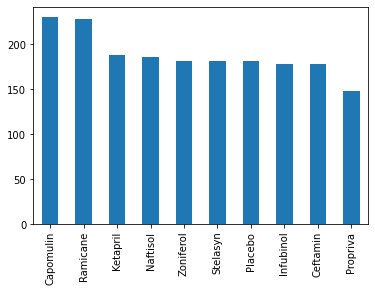

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mousecount= cleandata['Drug Regimen'].value_counts()

mousecount.plot(kind= "bar")
plt.show()


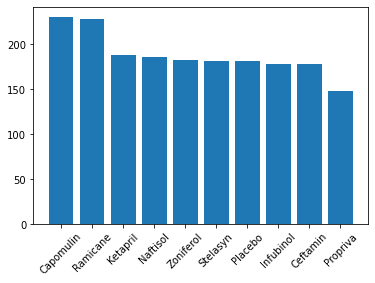

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(mousecount.index.values, mousecount.values)
plt.xticks(rotation= 45)
plt.show()


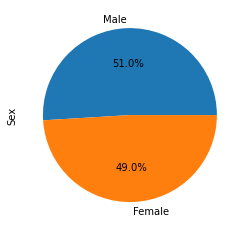

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mousecount= cleandata['Sex'].value_counts()
    mousecount.plot(kind= "pie",  autopct="%1.1f%%")
plt.show()


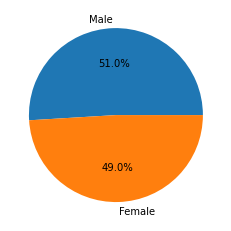

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mousecount.values, labels= mousecount.index.values, autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
greattumor= cleandata.groupby('Mouse ID').max()['Timepoint']
greattumor= greattumor.reset_index()
greattumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedata= greattumor.merge(cleandata, on= ["Mouse ID", "Timepoint"], how= "left")
mergedata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [39]:
# Put treatments into a list for for loop (and later for plot labels)

druglist= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumorvol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in druglist:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tvolume= mergedata.loc[mergedata["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumorvol.append(tvolume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tvolume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq



    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier= tvolume.loc[(tvolume < lower_bound)|(tvolume > upper_bound)]
    print (outlier)
   

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

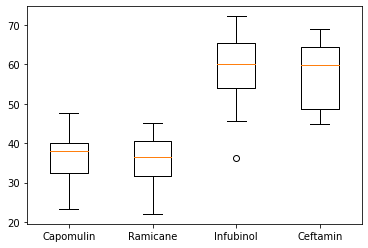

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot (tumorvol, labels= druglist)
plt.show

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin result for mouse s185')

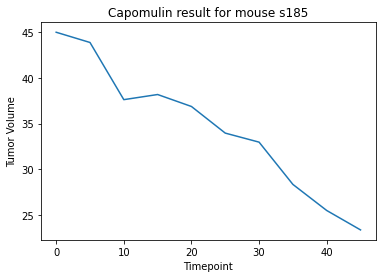

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
merge_line= study_results.loc[study_results['Mouse ID']== 's185']
merge_line.set_index('Mouse ID')
#Creating the line plot
plt.plot(merge_line['Timepoint'], merge_line['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Capomulin result for mouse s185")

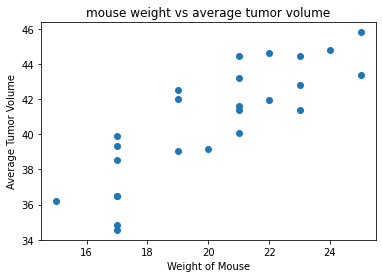

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avgtumorvolumecapo= datasetcombination.loc[(datasetcombination['Drug Regimen'] == 'Capomulin')]
avgtumorvolume= avgtumorvolumecapo.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouseweight= avgtumorvolumecapo.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(mouseweight,avgtumorvolume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Average Tumor Volume")
plt.title("mouse weight vs average tumor volume")
plt.show()


## Correlation and Regression

The correlation coefficient is 0.84


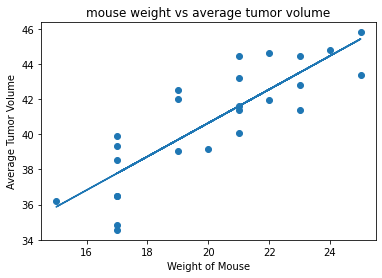

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avgtumorvolumecapo= datasetcombination.loc[(datasetcombination['Drug Regimen'] == 'Capomulin')]
avgtumorvolume= avgtumorvolumecapo.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouseweight= avgtumorvolumecapo.groupby('Mouse ID')['Weight (g)'].mean()
slope,intercept, r_value, p_value, std_err = st.linregress(mouseweight, avgtumorvolume)
fit = slope * mouseweight + intercept
correlation = st.pearsonr(mouseweight, avgtumorvolume)
plt.scatter(mouseweight,avgtumorvolume)
plt.plot(mouseweight, fit,"-")
plt.xlabel("Weight of Mouse")
plt.ylabel("Average Tumor Volume")
plt.title("mouse weight vs average tumor volume")
print(f"The correlation coefficient is {round(correlation[0],2)}")
plt.show()